<img src = "https://escp.eu/sites/default/files/logo/ESCP-logo-white-misalign.svg" width = 400 style="background-color: #240085;">
<h1 align=center><font size = 5>ESCP Business School</font></h1>
<h1 align=center><font size = 3>Introduction to Data Mining</font></h1>
<h1 align=center><font size = 3>Developing a Real/Fake Job Posting Predictor for a job-seeking platform (Company A)</font></h1>

Last Updated: November 29, 2021\
Author: Resha Dirga

<h3>Business Objectives</h3>

<p>Company A earns most of its revenue from premium job posting which was paid by the advertised companies. These premium job postings only consist of 8% of total job posting that being submitted to Company A. The non-premium job posts, while not generating revenue for Company A, plays a great role to pull in traffic to the platform.</p>

<p>Company A found that 18% of the non-premium job posts that were posted on the platform are fakes, which hurts the credibility of Company A. Currently, there is no dedicated team to check the validity of the job postings coming in since the current procedure is to perform the validation on the posted jobs and the validation process took a lot of time to perform.</p>

<p>Thus, this study is commissioned with the following objectives:</p>
<ul>
    <li>Improve the quality of job posts from fake posts</li>
    <li>Reduce the time of validation that required to validate the legitimacy of the job post</li>
</ul>
<p>The success criteria for this study are:</p>
<ul>
    <li>Reduces the number of fake job posts by 50%</li>
    <li>Evaluate all non-premium job posts</li>
    <li>Generates a usable tool/method to evaluate job posts legitimacy</li>
</ul>

<h3>Data Mining Goals</h3>

<p>Company A conducted a survey with a local university and identified the validity of over 15k job posts. By utilizing the survey, the goals of this study are:</p>
<ul>
    <li>Use the survey result to identify relevant features of job posts to look for to identify its legitimacy</li>
    <li>Use the survey data to build a model that can evaluate legitimacy of incoming job posts with an accuracy above 80%</li>
    <li>Build a model that can be integrated into the job posting pipeline that can filter 100% of the posts before posting on the platform</li>
</ul>

<h3>Data Understanding</h3>

<p>There are 17,880 job posts that have been collected and analyzed by the survey performed by Company A and the local university from various job-posting platforms. There are 16 features listed in the survey associated with each post. Please go to this <a href="https://www.kaggle.com/shivamb/real-or-fake-fake-jobposting-prediction" target="_blank">link</a> to see the data summary:</p>

<p>Since the data was collected from various sources, there might be inconsistencies on the features with categorical value type. These features need to be processed, as such, to identify similarities or to give similar impact for the category with similar meaning.</p>

<b><i>Data Quality</i></b>
<p><u>Missing data.</u> During the survey, Company A noticed that there are platforms that does not put some description as mandatory field. Thus, there are many null values on features that describes the job being offered, e.g.: department, salary_range, and benefits.</p>

<p><u>Coding inconsistencies.</u> There are typing inconsistencies in the categorical features for the same feature meaning. A preprocessing step is required to put these data into the right context with uniform code rules.</p>


<h3>Chapter 0: Import modules</h3>
<p>This chapter lists all modules that being used on this document. The module import process will be performed on this chapter</p>

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
# import seaborn as sns
from sklearn import preprocessing
from sklearn import tree
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import GridSearchCV, train_test_split

import sklearn.linear_model as linear_model
from sklearn.neighbors import KNeighborsClassifier
# from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import plot_confusion_matrix

import pickle

<h3>Chapter 1: Data Loading and Exploratory Data Analysis</h3>
<p>This chapter reads the data and provides an overview of the data, such as: the name of columns, number of values, data types within each columns. The first 5 data is also shown to get better understanding of the data.</p>

In [2]:
# read databases
df_jobposts = pd.read_csv('datasets/fake_job_postings.csv')

print('Jobpost Datasets')
df_jobposts.info()

Jobpost Datasets
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 18 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   job_id               17880 non-null  int64 
 1   title                17880 non-null  object
 2   location             17534 non-null  object
 3   department           6333 non-null   object
 4   salary_range         2868 non-null   object
 5   company_profile      14572 non-null  object
 6   description          17879 non-null  object
 7   requirements         15185 non-null  object
 8   benefits             10670 non-null  object
 9   telecommuting        17880 non-null  int64 
 10  has_company_logo     17880 non-null  int64 
 11  has_questions        17880 non-null  int64 
 12  employment_type      14409 non-null  object
 13  required_experience  10830 non-null  object
 14  required_education   9775 non-null   object
 15  industry             12977 non-null 

In [3]:
df_jobposts.head()

,job_id,title,location,department,salary_range,company_profile,description,requirements,benefits,telecommuting,has_company_logo,has_questions,employment_type,required_experience,required_education,industry,function,fraudulent
0,1,Marketing Intern,"US, NY, New York",Marketing,NaN,"We're Food52, and we've created a groundbreaki...","Food52, a fast-growing, James Beard Award-winn...",Experience with content management systems a m...,NaN,0,1,0,Other,Internship,NaN,NaN,Marketing,0
1,2,Customer Service - Cloud Video Production,"NZ, , Auckland",Success,NaN,"90 Seconds, the worlds Cloud Video Production ...",Organised - Focused - Vibrant - Awesome!Do you...,What we expect from you:Your key responsibilit...,What you will get from usThrough being part of...,0,1,0,Full-time,Not Applicable,NaN,Marketing and Advertising,Customer Service,0
2,3,Commissioning Machinery Assistant (CMA),"US, IA, Wever",NaN,NaN,Valor Services provides Workforce Solutions th...,"Our client, located in Houston, is actively se...",Implement pre-commissioning and commissioning ...,NaN,0,1,0,NaN,NaN,NaN,NaN,NaN,0
3,4,Account Executive - Washington DC,"US, DC, Washington",Sales,NaN,Our passion for improving quality of life thro...,THE COMPANY: ESRI – Environmental Systems Rese...,"EDUCATION: Bachelor’s or Master’s in GIS, busi...",Our culture is anything but corporate—we have ...,0,1,0,Full-time,Mid-Senior level,Bachelor's Degree,Computer Software,Sales,0
4,5,Bill Review Manager,"US, FL, Fort Worth",NaN,NaN,SpotSource Solutions LLC is a Global Human Cap...,JOB TITLE: Itemization Review ManagerLOCATION:...,QUALIFICATIONS:RN license in the State of Texa...,Full Benefits Offered,0,1,1,Full-time,Mid-Senior level,Bachelor's Degree,Hospital & Health Care,Health Care Provider,0


<h3>Chapter 2: Data Preparation</h3>
<p>This chapter preprocesses the data to get dataset that is ready for analysis. The preprocessing include:
<ul>
    <li>Drop unused columns or those that cannot be used on the statistics (e.g., columns that will not be used to build the model)</li>
    <li>Convert data to 'ready-to-process' types, for example converting long descriptive texts to word count integer</li>
</ul>
</p>

In [4]:
# columns categorisation
col_short_descriptive_drop = ['job_id','title']
col_short_descriptive = ['location', 'department', 'salary_range']
col_long_descriptive = ['company_profile', 'description','requirements','benefits']
col_bool = ['telecommuting', 'has_company_logo', 'has_questions']
col_categorical = ['employment_type', 'required_experience', 'required_education', 'industry', 'function']

In [5]:
# data preprocessing for short descriptives

le = preprocessing.LabelEncoder()

encoded_columns = ['en_location', 'en_department', 'en_salary_range']

for column in col_short_descriptive:
    encoded_short_descriptive = le.fit_transform(df_jobposts[column])
    index = col_short_descriptive.index(column)
    df_jobposts[encoded_columns[index]] = encoded_short_descriptive

In [6]:
# data preprocessing for long descriptives

word_count_columns = ['wc_company_profile', 'wc_description','wc_requirements','wc_benefits']

for feature in col_long_descriptive:
    word_count = df_jobposts[feature].str.split().str.len()
    index = col_long_descriptive.index(feature)
    df_jobposts[word_count_columns[index]] = word_count
    
df_jobposts[word_count_columns] = df_jobposts[word_count_columns].fillna(0)

In [7]:
# data preprocessing for categorical

for column in col_categorical:
    print(column)
    print(df_jobposts[column].unique())

employment_type
['Other' 'Full-time' nan 'Part-time' 'Contract' 'Temporary']
required_experience
['Internship' 'Not Applicable' nan 'Mid-Senior level' 'Associate'
 'Entry level' 'Executive' 'Director']
required_education
[nan "Bachelor's Degree" "Master's Degree" 'High School or equivalent'
 'Unspecified' 'Some College Coursework Completed' 'Vocational'
 'Certification' 'Associate Degree' 'Professional' 'Doctorate'
 'Some High School Coursework' 'Vocational - Degree'
 'Vocational - HS Diploma']
industry
[nan 'Marketing and Advertising' 'Computer Software'
 'Hospital & Health Care' 'Online Media'
 'Information Technology and Services' 'Financial Services'
 'Management Consulting' 'Events Services' 'Internet'
 'Facilities Services' 'Consumer Electronics' 'Telecommunications'
 'Consumer Services' 'Construction' 'Oil & Energy' 'Education Management'
 'Building Materials' 'Banking' 'Food & Beverages' 'Food Production'
 'Health, Wellness and Fitness' 'Insurance' 'E-Learning' 'Cosmetics'
 'St

In [8]:
# encode categorical columns
encoded_columns = ['en_employment_type', 'en_required_experience', 'en_required_education', 'en_industry', 'en_function']

for column in col_categorical:
    encoded_category = le.fit_transform(df_jobposts[column])
    index = col_categorical.index(column)
    df_jobposts[encoded_columns[index]] = encoded_category

In [9]:
# prepare new dataframe for modeling purpose
col_for_model = ['en_location', 'en_department', 'en_salary_range', 'wc_company_profile', 'wc_description','wc_requirements','wc_benefits', 'en_employment_type', 'en_required_experience', 'en_required_education', 'en_industry', 'en_function', 'fraudulent']

df_jobposts_clean = pd.DataFrame(df_jobposts[col_for_model], columns=col_for_model)
df_jobposts_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17880 entries, 0 to 17879
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   en_location             17880 non-null  int64  
 1   en_department           17880 non-null  int64  
 2   en_salary_range         17880 non-null  int64  
 3   wc_company_profile      17880 non-null  float64
 4   wc_description          17880 non-null  float64
 5   wc_requirements         17880 non-null  float64
 6   wc_benefits             17880 non-null  float64
 7   en_employment_type      17880 non-null  int64  
 8   en_required_experience  17880 non-null  int64  
 9   en_required_education   17880 non-null  int64  
 10  en_industry             17880 non-null  int64  
 11  en_function             17880 non-null  int64  
 12  fraudulent              17880 non-null  int64  
dtypes: float64(4), int64(9)
memory usage: 1.8 MB


<h3>Chapter 3: Modelling</h3>
<p>This chapter define and compile the model, incuding choosing the best hyperparameters for the model. This chapter will test several model available on scikit then determine the best models based on analysis.
</p>

In [10]:
# Assign train and test data

col_features = ['en_location', 'en_department', 'en_salary_range', 'wc_company_profile', 'wc_description','wc_requirements','wc_benefits', 'en_employment_type', 'en_required_experience', 'en_required_education', 'en_industry', 'en_function']
col_target = ['fraudulent']

x = df_jobposts_clean[col_features].to_numpy()
y = df_jobposts_clean[col_target].to_numpy()

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

<b><i>Model 1 - Regression Model</i></b>

In [11]:
model_regression = linear_model.LogisticRegression()
model_regression.fit(x_train,y_train)
y_predict = model_regression.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


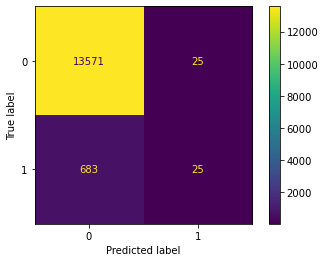

In [12]:
plot_confusion_matrix(model_regression, x_train, y_train)

<b><i>Model 2 - K-Nearest Neighbour</i></b>

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was 

Text(0, 0.5, 'Error mean')

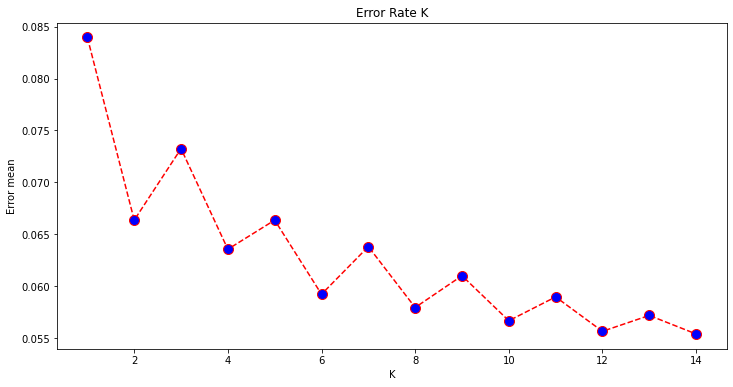

In [13]:
# Find best n_neighbors value

error = []

for i in range(1,15):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train, y_train)
    pred_i = knn.predict(x_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12,6))
plt.plot(range(1,15), error, color='red', linestyle='dashed', marker='o', markerfacecolor='blue', markersize=10)
plt.title('Error Rate K')
plt.xlabel('K')
plt.ylabel('Error mean')

In [14]:
model_knn = KNeighborsClassifier(n_neighbors=12)
model_knn.fit(x_train, y_train)
y_predict = model_knn.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/neighbors/_classification.py:198: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


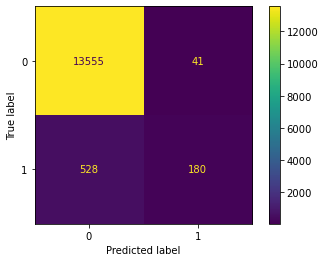

In [15]:
plot_confusion_matrix(model_knn, x_train, y_train)

<b><i>Model 3 - Decision Tree</i></b>

In [16]:
# Best hyperparameter search
max_depths = list(range(1,20))
criterion = ['gini', 'entropy']

param_grid = {'criterion': criterion,
              'max_depth': max_depths}

grid_search = GridSearchCV(DecisionTreeClassifier(),param_grid,scoring='accuracy')
grid_search.fit(x_train, y_train)
grid_search.best_params_

{'criterion': 'entropy', 'max_depth': 18}

In [17]:
model_dct = DecisionTreeClassifier(max_depth=18, criterion='entropy')
model_dct.fit(x_train, y_train)
y_predict = model_dct.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


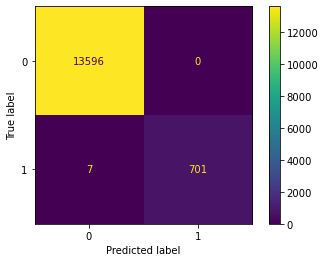

In [18]:
plot_confusion_matrix(model_dct, x_train, y_train)

<h5>Model 4 - Random Forest</h5>

In [19]:
# Assume best hyperparameter is similar to Decision Tree
model_rdf = RandomForestClassifier(max_depth=18, criterion='entropy')
model_rdf.fit(x_train, y_train)
y_predict = model_rdf.predict(x_test)

/var/folders/h0/vgjkl_895611pw1tzh74wq280000gn/T/ipykernel_1457/930748560.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  model_rdf.fit(x_train, y_train)


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


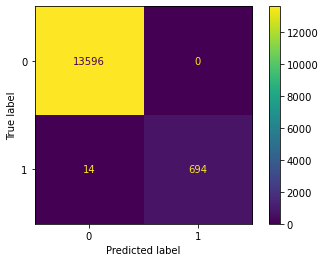

In [20]:
plot_confusion_matrix(model_rdf, x_train, y_train)

<h5>Model 5 - Naive Bayes</h5>

In [21]:
model_nbg = GaussianNB()
model_nbg.fit(x_train, y_train)
y_predict = model_nbg.predict(x_test)

/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:985: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


/Users/admin/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


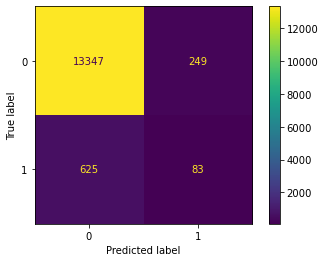

In [22]:
plot_confusion_matrix(model_nbg, x_train, y_train)

<b><i>Model 6 - Support Vector Machine Linear</i></b>

In [ ]:
# model_svm_lin = svm.SVC(kernel='linear')
# model_svm_lin.fit(x_train, y_train)
# y_predict = model_svm_lin.predict(x_test)

In [ ]:
# plot_confusion_matrix(model_svm_lin, x_train, y_train)

<h5>Model 7 - Support Vector Machine RBF</h5>

In [ ]:
# model_svm_rbf = svm.SVC(kernel='rbf')
# model_svm_rbf.fit(x_train, y_train)
# y_predict = model_svm_rbf.predict(x_test)

In [ ]:
# plot_confusion_matrix(model_svm_rbf, x_train, y_train)

<h5>Best Model Decision</h5>
<p>The analysis of choosing the best model for the dataset</p>

In [23]:
# Score calculation
list_model = [
    model_regression,
    model_knn,
    model_dct,
    model_rdf,
    model_nbg,
#     model_svm_lin,
#     model_svm_rbf
]

result = []

for mod in list_model:
    a = mod.score(x_train, y_train)
    b = mod.score(x_test, y_test)
    
    result.append(
        {
            mod: {
                'score_train': a,
                'score_test': b
            }
        })
    
result

[{LogisticRegression(): {'score_train': 0.950503355704698,
   'score_test': 0.9552572706935123}},
 {KNeighborsClassifier(n_neighbors=12): {'score_train': 0.9602209172259508,
   'score_test': 0.9600111856823266}},
 {DecisionTreeClassifier(criterion='entropy', max_depth=18): {'score_train': 0.9995106263982103,
   'score_test': 0.9650447427293065}},
 {RandomForestClassifier(criterion='entropy', max_depth=18): {'score_train': 0.9990212527964206,
   'score_test': 0.9807046979865772}},
 {GaussianNB(): {'score_train': 0.9388982102908278,
   'score_test': 0.9432326621923938}}]